تحميل المكتبات الاساسية

In [541]:
# Import pandas into the environment
import pandas as pd
# Import numpy
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

قراءة البيانات

In [542]:

# Import marketing.csv with date columns
marketing = pd.read_csv('marketing.csv' )


Cleaning

In [543]:
marketing.head(2)

,user_id,date_served,marketing_channel,variant,language_displayed,language_preferred,age_group,date_subscribed,date_canceled
0,a100000029,1/1/2018,Youtube,personalization,English,English,0-18 years,1/1/2018,NaN
1,a100000030,1/1/2018,Youtube,personalization,English,English,19-24 years,1/1/2018,NaN


In [544]:
# Columns types
print(marketing.dtypes)

user_id               object
date_served           object
marketing_channel     object
variant               object
language_displayed    object
language_preferred    object
age_group             object
date_subscribed       object
date_canceled         object
dtype: object


In [545]:
# Dates columns
marketing['date_served'] = pd.to_datetime(marketing['date_served'])
marketing['date_subscribed'] = pd.to_datetime(marketing['date_subscribed'])
marketing['date_canceled'] = pd.to_datetime(marketing['date_canceled'])

EDA

In [546]:
marketing.describe( include = 'all')

,user_id,date_served,marketing_channel,variant,language_displayed,language_preferred,age_group,date_subscribed,date_canceled
count,9995,9995,9995,9995,9995,9995,9995,1050,349
unique,7294,31,5,2,4,4,7,31,113
top,a100000882,2018-01-15 00:00:00,Youtube,control,English,English,19-24 years,2018-01-16 00:00:00,2018-01-11 00:00:00
freq,12,763,4732,5050,9754,9235,1674,102,7
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,2018-01-05 00:00:00
last,NaN,2018-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,2018-01-31 00:00:00,2018-05-09 00:00:00


رح نقسم البيانات الى مجموعتين منشان نعرض القيم

In [547]:
# categorycolumns
categorycolumns = [column for column in marketing.columns 
                        if marketing.dtypes[column] == 'object'
                          and
                            marketing[column].nunique() < 8 ]

In [548]:
def categories_summary (columns):
    for column in columns:
        print (f"--------{column}--------")
        print(marketing[column].value_counts())
        print("---------------------------------")

نحن رح نستغرض البيانات حاليا وبنفس الوقت بدنا نفكر بالاسئلة الي رح نجاوي عليها
الاسئلة رح تتمحور حول الامور الي بترفع مستوى الحملة و كيف نحسنها اذا في مشكلة

In [549]:
categories_summary (categorycolumns)

--------marketing_channel--------
Youtube      4732
Instagram    1871
Facebook     1860
LinkedIn      993
Email         539
Name: marketing_channel, dtype: int64
---------------------------------
--------variant--------
control            5050
personalization    4945
Name: variant, dtype: int64
---------------------------------
--------language_displayed--------
English    9754
Spanish     133
German       81
Arabic       27
Name: language_displayed, dtype: int64
---------------------------------
--------language_preferred--------
English    9235
Spanish     448
German      167
Arabic      145
Name: language_preferred, dtype: int64
---------------------------------
--------age_group--------
19-24 years    1674
24-30 years    1566
0-18 years     1533
30-36 years    1346
36-45 years    1346
45-55 years    1345
55+ years      1185
Name: age_group, dtype: int64
---------------------------------


متل ماشفنا في تفاوت في القنوات الاخبارية وهاد من المنطقي رح يجبلنا زباين اكتر بس هون لازم نسئل سؤال شو اهية افضل قناة للاعلان

انواع الحملة هية متوزانة بين الكونترول و المخصص

متل ما عمنشوف في عنا مشكلة باللغة المعروضة و اللغة المفضلة هاد الشي قديش تاثيرو رح نشوفوا انشاءالله
في تفاوت ب اعداد المجموعات العمرية لهيك يفضل انو كمان نشوف الافضل للتسويق

In [550]:
# datescolumns
datescolumns = [column for column in marketing.columns 
                        if marketing.dtypes[column] == 'datetime64[ns]']  

In [551]:
def dates_summary (columns):
    for column in columns:
        plt.figure(figsize=(12,4))
        #marketing[column].value_counts().plot()# # Report 1 line chart # method 2
        marketing.groupby([column])['user_id'].nunique().plot()
        plt.title(column)
        plt.show()
        #print (marketing.groupby([column])['user_id'].nunique().describe())


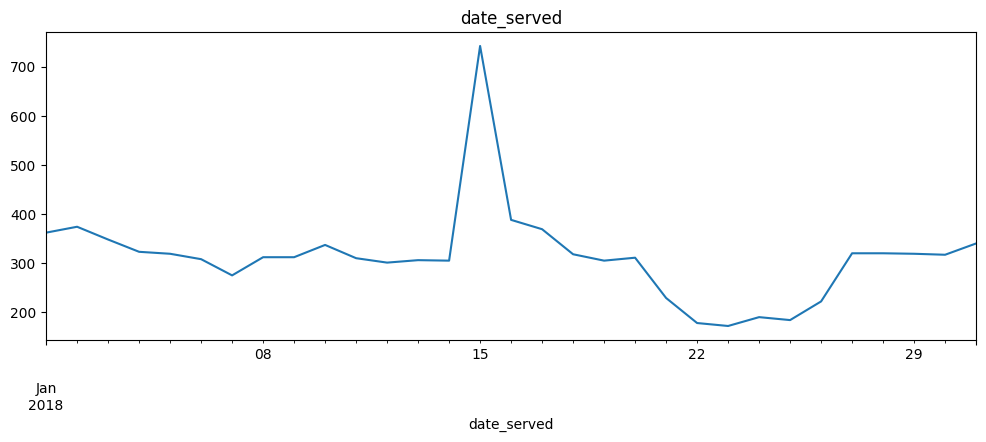

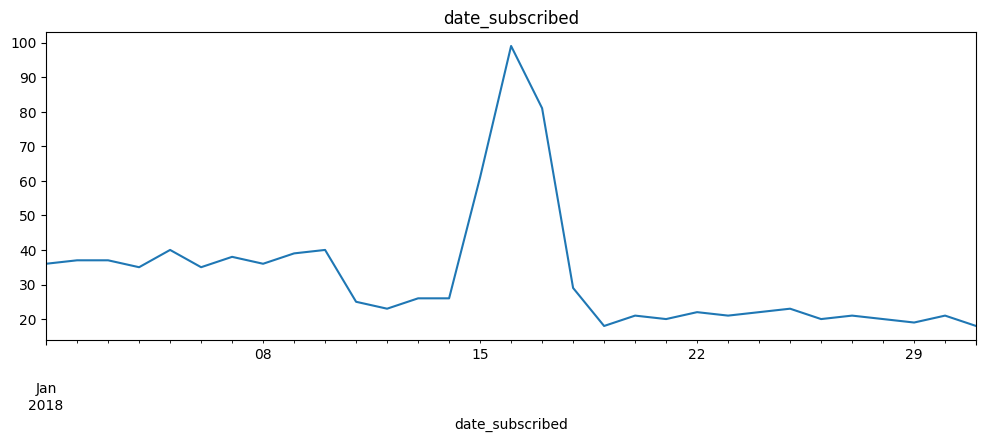

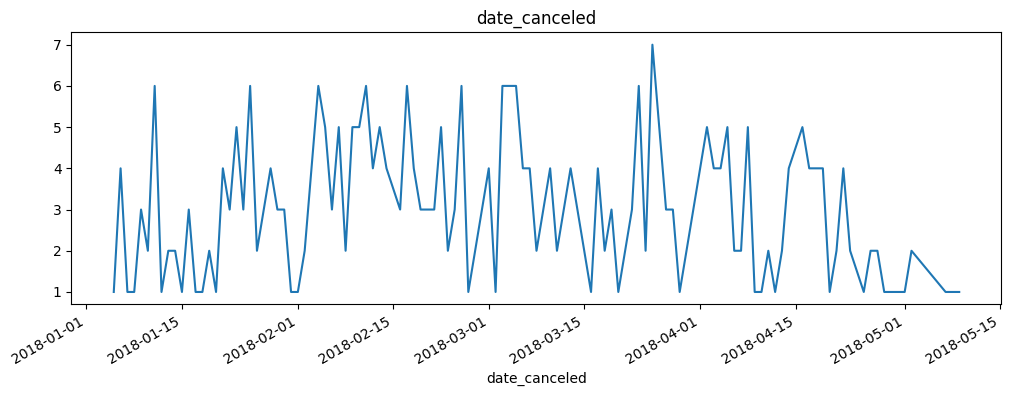

In [552]:
dates_summary(datescolumns)

الشارت فيها تقلبات لهيك لازم نشوفها بشكل اعمق لهيك رح ندمج التواريخ مع الفئات المختلفة

In [553]:
# Date_served and category columns
def dates_categories_summary (columns):
    for column in columns:
        
        f, axes = plt.subplots(2)
        f.set_figwidth(15)
        f.suptitle(column , fontsize=16 , fontweight='bold' , style='italic' , verticalalignment= 'top' ,  color='red')
        plt.subplots_adjust(bottom =0.1 , hspace=0.5)

        
        served = marketing.groupby([ 'date_served',column])['user_id'].nunique().unstack(level=1)
        axes[0].plot(served)
        axes[0].set_title('date_served')
        axes[0].legend(labels = served.columns , loc  = 'right')
        
        subscribed = marketing.groupby([ 'date_subscribed',column])['user_id'].nunique().unstack(level=1)
        axes[1].plot(subscribed)
        axes[1].set_title('date_subscribed')
        axes[1].legend(labels = subscribed.columns , loc  = 'right')

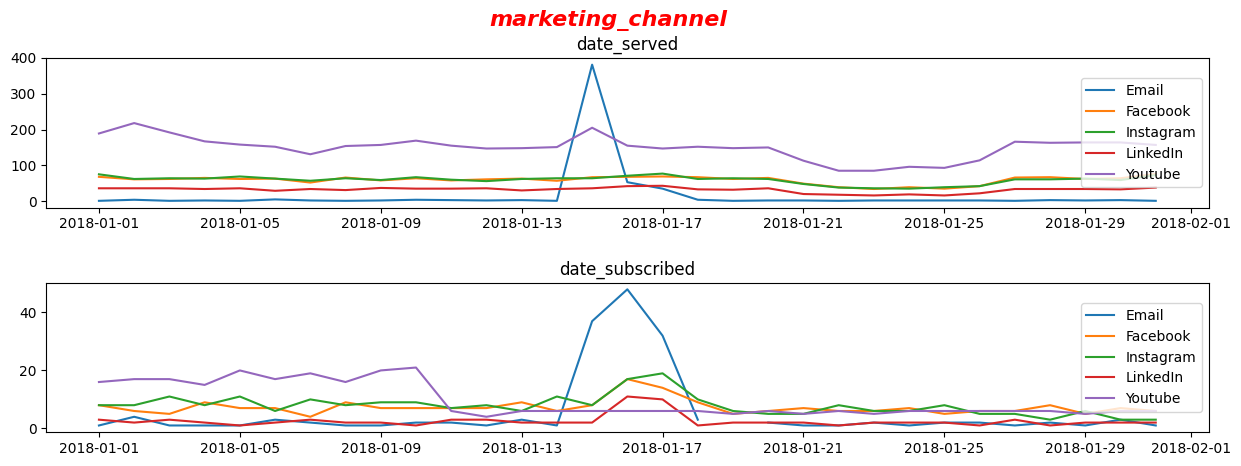

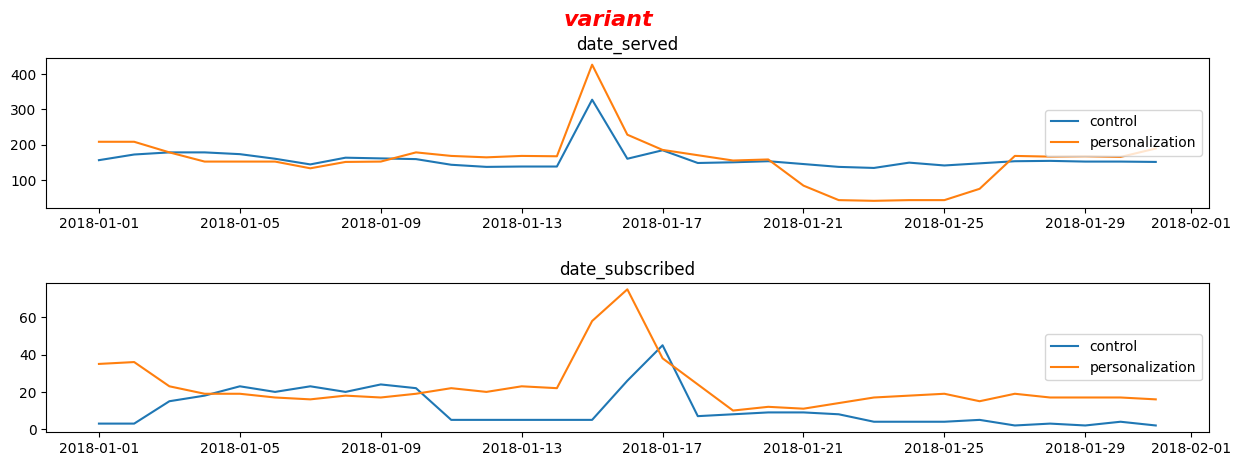

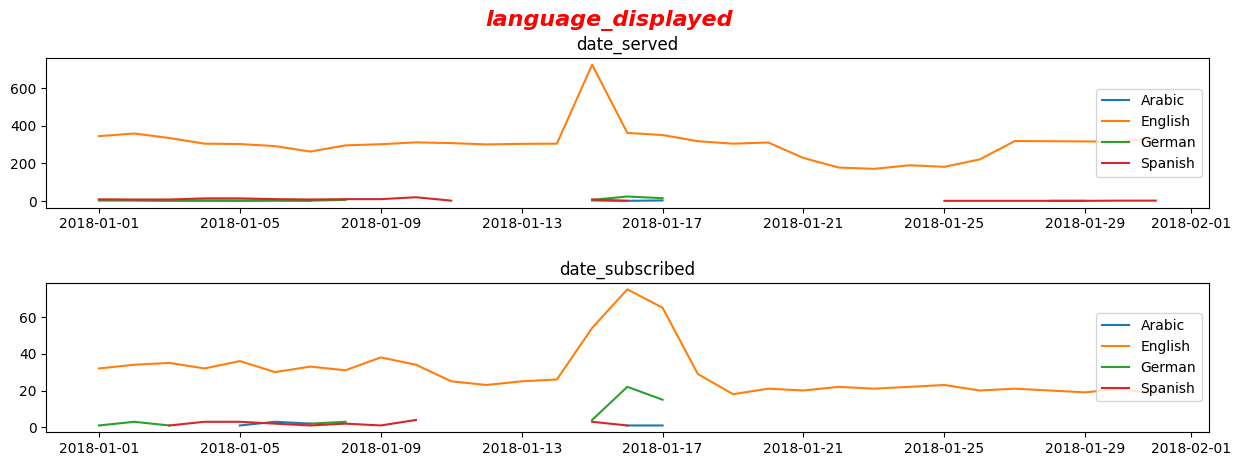

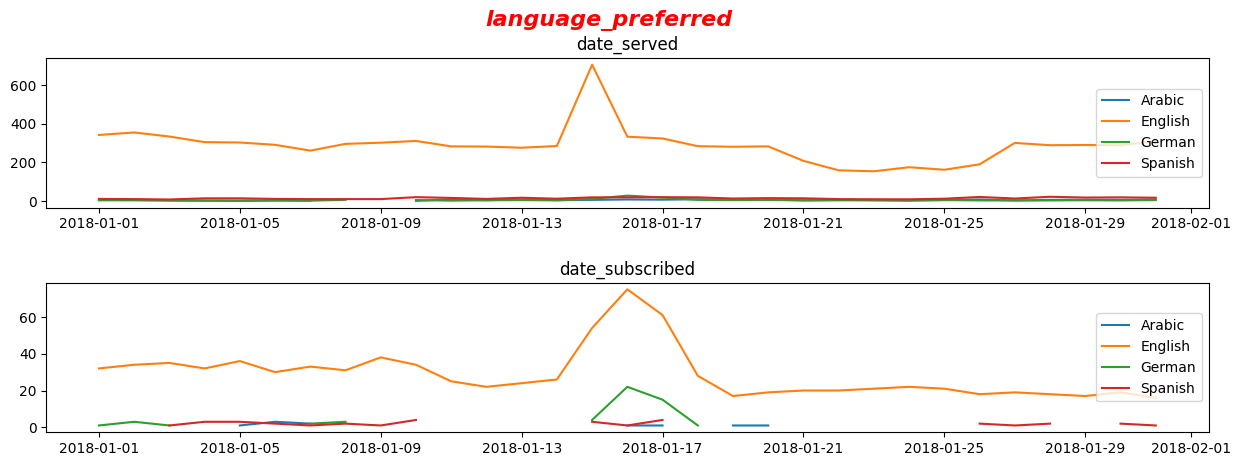

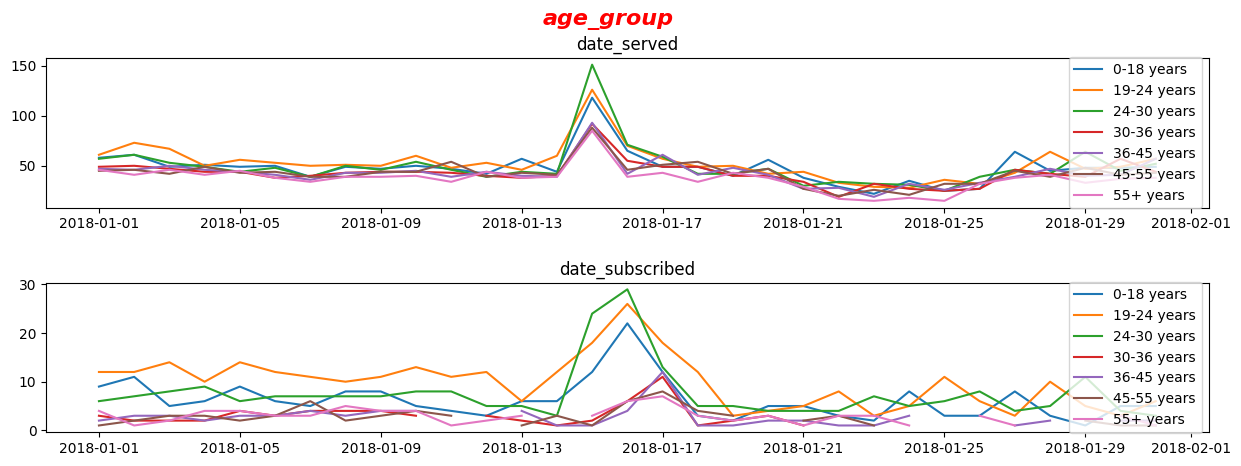

In [554]:
dates_categories_summary (categorycolumns)

اولا في قطع في المشتركين في اليوتيوب وهاد قطع واطح لازم نستكشفوا ونشوف شو صاير
اللغة فيها مشكلة بتبلش من احد عشر وكمان رح نشوفها
الشارت تبع الاعمار فيو قطع رح نشوفوا

بيهمنا انو الحملة تكون متوازية على جميع التقسيمات منشان نحصل على نتائج افضل متل ماشفنا موضوع اللغة فيو مشكلة بالاضافة لموضوع الايميل

هلق صار عنا تصور بسيط عن احتمال يكون في مشاكل في الحملة بالاضافة لنصائح

# هاد الدرس التاني فيو المؤشرات و شوية داتا انجينيري

Feature Engineering

متل ماشفنا الدرس الماضي كان في عنا اسئلة رح نشوف هي الاسئلة شو هوة انعكاسها على المؤشرات
هون رح نضيف اعمدة مساعدة
طريقة الاضافة متعلقة ب المؤشرات وبدها شوية دومين نولج

2. is correct language
3. converted
4. is_retained

In [555]:

# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(marketing['language_displayed']== marketing['language_preferred'],'Yes' ,'No')
# print (marketing.columns)

In [556]:
# Add the new column converted
marketing['converted'] = np.where(marketing['date_subscribed'].isnull(), False, True)

**KPI**

1. **calculating conversion rate**

In [557]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing['converted']== True ]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers / total
print(round(conversion_rate*100, 2), "%")

13.56 %


In [558]:
# Add the new column is_retained
marketing['is_retained'] = np.where((marketing['converted'] == True ) & (marketing['date_canceled'].isnull()) ,True,False)

2. **Calculating retention rate**

In [559]:
# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained']== True ]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/subscribers

print(round(retention_rate*100, 2), "%")

66.23 %


المؤشرات ضرورية تكون متماشية مع بعضها البض
الفكرة الي لازم نشوفها هي المؤشرات  بين الفئات المختلفة

**Customer segmentation**

Which Marketing channels has the best retention rate

Stakeholders have begun competing to see whose channel had the best retention rate from the campaign. You must first determine how many subscribers came from the campaign and how many of those subscribers have stayed on the service.

It's important to identify how each marketing channel is performing because this will affect company strategy going forward. If one channel is outperforming others, it might signal the channel merits further investment.

In [560]:
# Table View
Marketing_retention_rate_total = marketing[marketing['is_retained']== True].groupby(['marketing_channel'])['user_id'].nunique() 
Marketing_conversation_rate_total = marketing[marketing['converted']== True].groupby(['marketing_channel'])['user_id'].nunique()
Marketing_retention_rate = (Marketing_retention_rate_total/Marketing_conversation_rate_total)*100
Marketing_retention_rate

marketing_channel
Email        73.291925
Facebook     68.778281
Instagram    68.103448
LinkedIn     70.129870
Youtube      58.053691
Name: user_id, dtype: float64

متل ماشفنا انو الايميل هوة ترتيبوا الاول بالرغم كانت الحملة مركزة اكثر على يوتيوب بس هل فينا نقول اكيد انو الحملة افضل هاد الشي الي رح يجاوبنا على اختبار ا ب 

اذا بدنا نحسب المؤشرات لكل تقسيمة ف رح يصير تكرار للاكواد لهيك رح نساوي فانكشن

  هون اهمية بناء فانكشن لاني نحن رح نحسب معدل التغير لكل فئة ولتكون نتائجا افضل اهيمة رح نقاطع البيانات مع اعمدة التاريخ هي منشان مايتاثر الموضوع في الحملة لاني متل ماشفنا مامنحسن نعتمد على التاريخ وناخد قيم مجردة
  طبعا منشان مقاطعة البيانات بشكل كامل 

متل ماشفنا هدول المؤشرات ضرورية منشان ناخد قرار افضل لهيك في الدرس الجاي انشاءالله رح نساوي فانكشن مومعقول نعيد الكود

# الدرس الثالث بناء فانكشن

**Building functions to automate analysis**

In [561]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']== True].groupby(column_names)['user_id'].nunique()
    # Total number users
    column_total =  dataframe.groupby(column_names)['user_id'].nunique()
    # Conversion rate 
    conversion_rate = column_conv/column_total
    # Fill missing values with 0
    conversion_rate = conversion_rate.replace (np.nan , 0)
    return conversion_rate

In [562]:
# Building a retention function
def retention_rate(dataframe, column_names):
    # Group by column_names and calculate retention
    retained = dataframe[dataframe['is_retained'] == True].groupby(column_names)['user_id'].nunique()
    # Group by column_names and calculate conversion
    converted = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
    retention_rate = retained/converted
    return retention_rate

In [591]:
#Plotting fucntion
def plotting(dataframe , Title):
    for column in dataframe:
        plt.figure(figsize=(12,4))
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])

        plt.title('Daily ' + column + f' {Title}\n', size = 16)
        plt.ylabel(f'{Title} (%)', size = 14)
        plt.xlabel('Date', size = 14)
        plt.show()

In [597]:
daily_conversion = conversion_rate(marketing, ['date_served' , 'marketing_channel']).unstack(level=1)

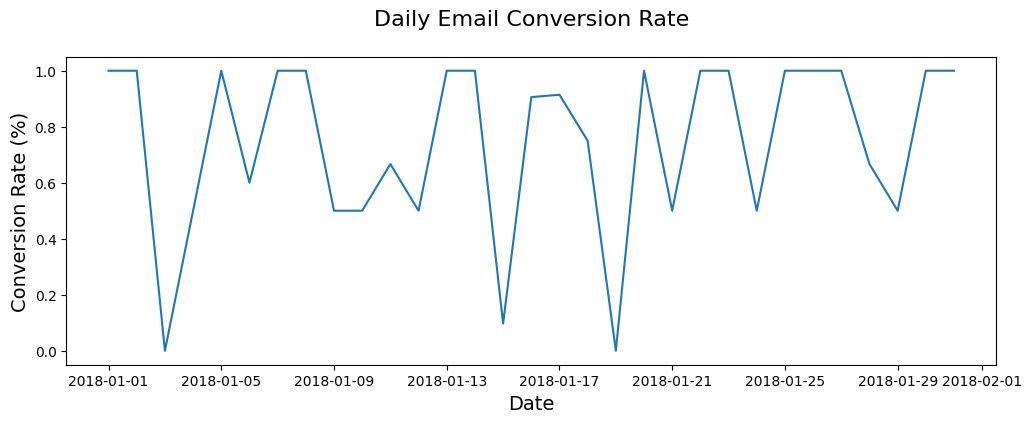

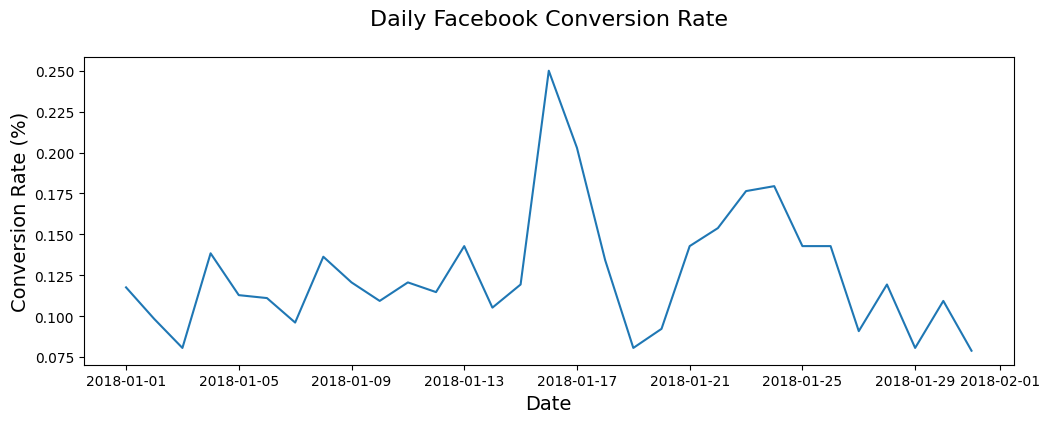

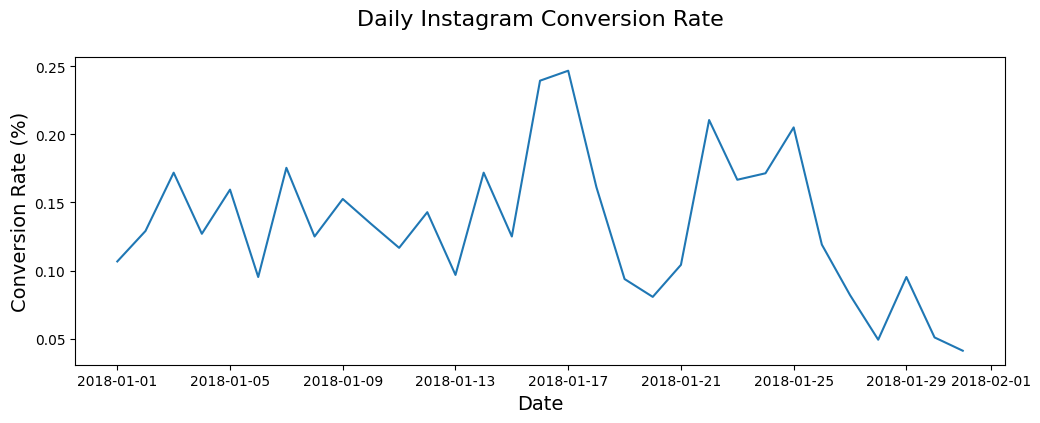

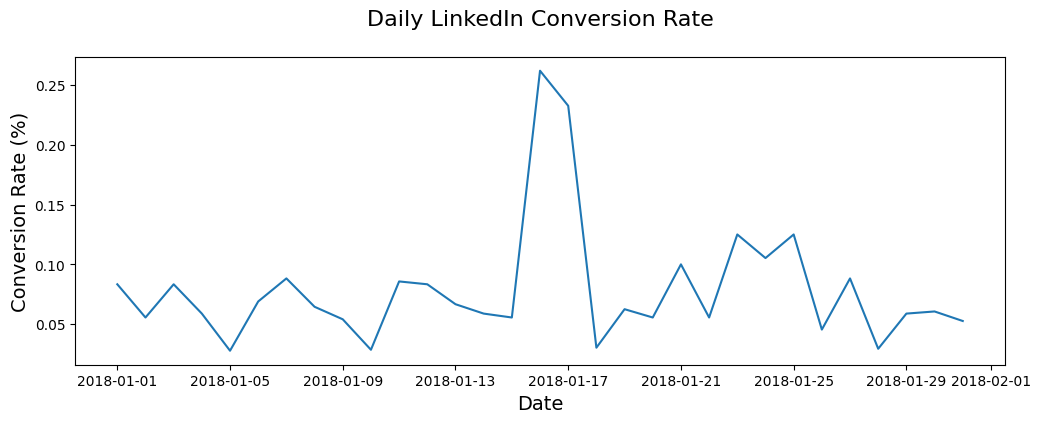

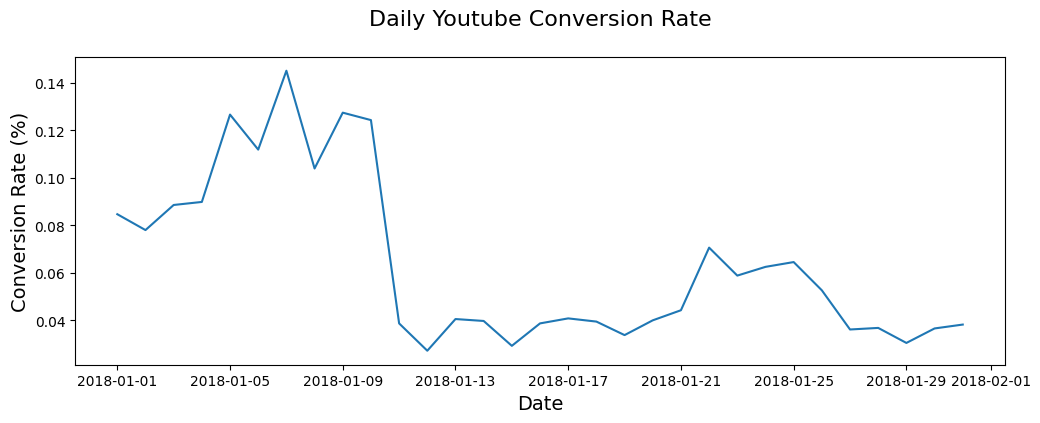

In [598]:
plotting(daily_conversion , 'Conversion Rate')

متل ماشفنا اليوتيوب فيو انكسرات بعد احد عشر خلونا  رح نقارنها باللغة

In [600]:
Youtube_df = marketing[marketing['marketing_channel'] == 'Youtube']
daily_conversion = conversion_rate(Youtube_df, ['date_served' , 'language_displayed']).unstack(level=1)

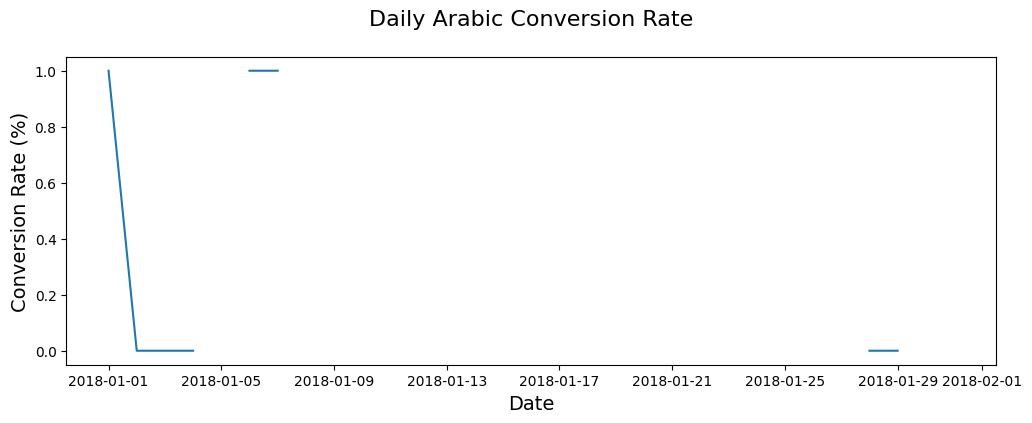

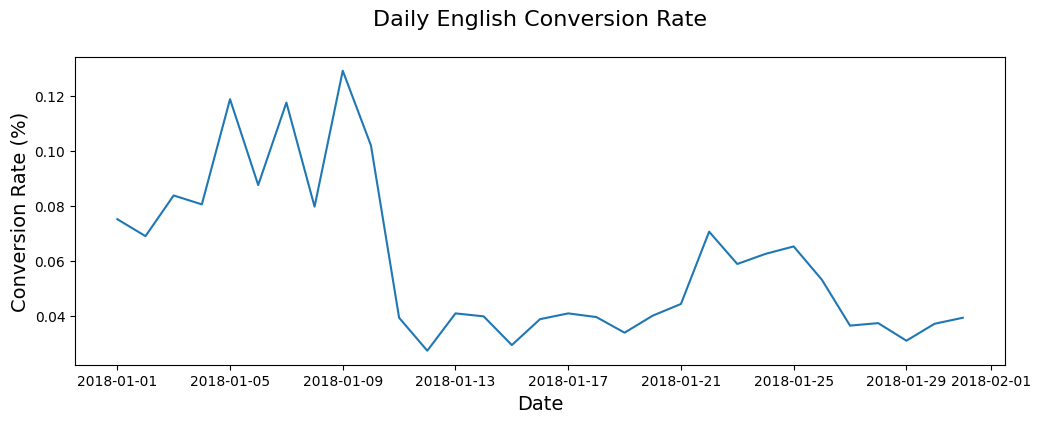

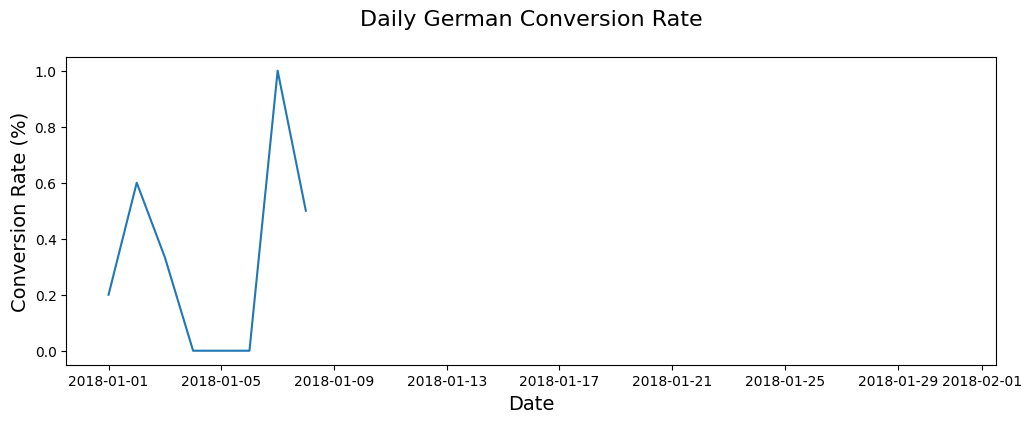

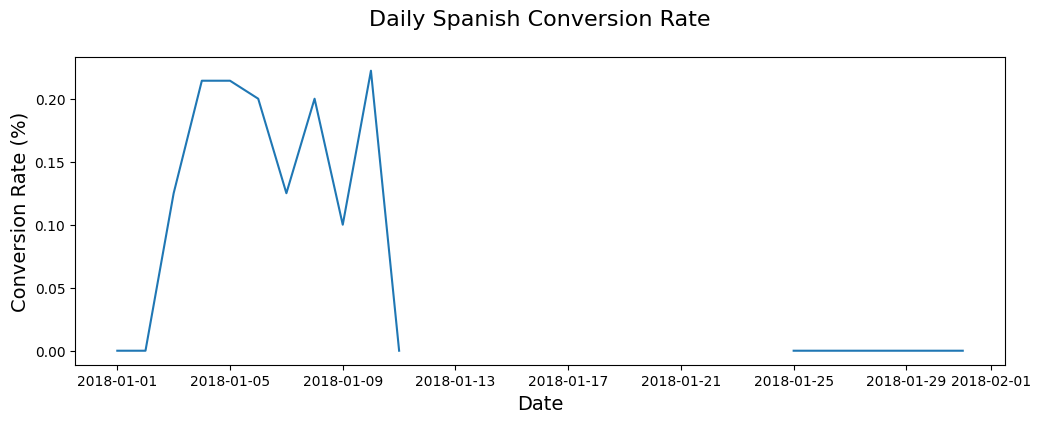

In [601]:
plotting(daily_conversion , 'Conversion Rate')

متل ماشفنا اللغة الانكليزية فيها انكسار كبير بالاضافة لباقي اللغات فيها قطع

**حل التناقضات**

Now that you've ruled out natural fluctuations across the day of the week a user saw our marketing assets as they cause for decreasing house ads conversion, you will take a look at conversion by language over time. Perhaps the new marketing campaign does not apply broadly across different cultures.

Ideally, the marketing team will consider cultural differences prior to launching a campaign, but sometimes mistakes are made, and it will be your job to identify the cause. Often data scientists are the first line of defense to determine what went wrong with a marketing campaign. It's your job to think creatively to identify the cause.

In [569]:
# a = marketing[marketing['language_preferred'] == "Arabic"]
# a.groupby('date_served')['user_id'].nunique()

In [572]:
# # Isolate the rows where marketing channel is House Ads
# house_ads = marketing[marketing['marketing_channel']=='Youtube']

# # Calculate conversion by date served, and language displayed
# conv_lang_channel = conversion_rate (house_ads,['date_served','language_displayed'])
# conv_lang_channel_df = conv_lang_channel.unstack(level=1)

# # Use your plotting function to display results
# plotting(conv_lang_channel_df ,'Conversion rate')

خلونا نشوف عرض اللغة كل يوم

In [603]:

# Groupby date_served and correct_language
language_check = Youtube_df.groupby(['date_served','is_correct_lang'])['user_id'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


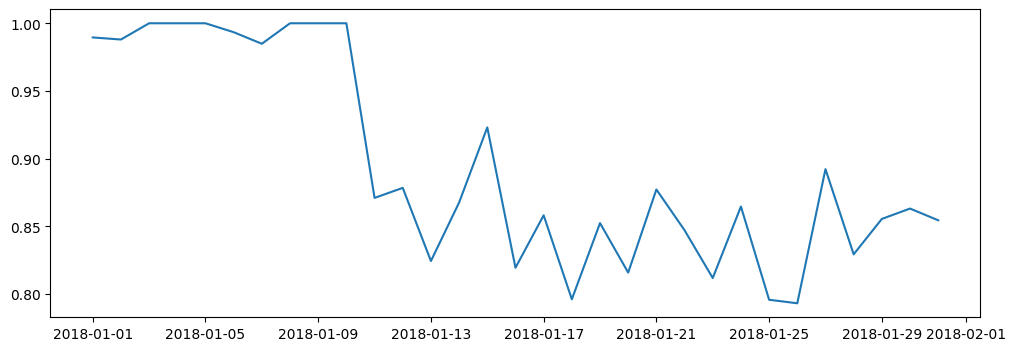

In [576]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis = 1)
plt.figure(figsize=(12,4))
# Plot and show your results
plt.plot(language_check_df.index, language_check_df['pct'] )
plt.show()

حسب المشاكل الي صارت فينا نقول كان في عنا مشكلة في التاريخ

**Resolving inconsistencies**

While you cannot ignore data related to errors in the campaign, 
you can estimate what conversion might have looked like if there had been no issues. 
One way to assess impact is to index all other languages' conversion rates to English during the period where the ads were running in the correct language for each user.


بما انه مامنحسن نغير الي صار بس منحسن بس منحسن نتوقع بس منحسن انو نتوقع قديش خصرنا زباين

In [604]:
"""
We begin by slicing the house_ads DataFrame to include the rows where the date_served is prior to when the language bug arose. 
Using our conversion_rate() function, 
we calculate the conversion rate for each language during that period.
"""
# Calculate pre-error conversion rate
# Bug arose sometime around '2018-01-11'
house_ads_no_bug = Youtube_df[Youtube_df['date_served'] < '2018-01-11']

lang_conv = conversion_rate(house_ads_no_bug,['language_displayed'])
lang_conv

language_displayed
Arabic     0.500000
English    0.099093
German     0.444444
Spanish    0.166667
Name: user_id, dtype: float64

In [578]:
"""
then divide the conversion rate of all other languages by the conversion rate of English 
in order to understand the relative relationship of 
how well our marketing assets typically convert users for each language compared to English.
"""
# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

In [579]:
# Interpreting Indexes
# Spanish-speaking users typically convert 1.7 times the rate of English-speakers
print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)


Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


Daily conversion

we calculate the total number of users and actual conversions on each day

In [580]:
# Create actual conversion DataFrame
language_conversion = Youtube_df.groupby(['date_served', 'language_preferred']).agg({'user_id':'nunique','converted':'sum'})
language_conversion.head(2)

user_id  converted
date_served language_preferred                    
2018-01-01  Arabic                    2          2
            English                 171         13

In [581]:
expected_conversion = pd.DataFrame(language_conversion.unstack(level=1))
expected_conversion.head(2)

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0       2.0    13.0    1.0   
2018-01-02             3.0   200.0    5.0    10.0       0.0    14.0    3.0   

                            
language_preferred Spanish  
date_served                 
2018-01-01             0.0  
2018-01-02             0.0

In [582]:
# Create English conversion rate column for affected period
expected_conversion['actual_english_conversions'] = expected_conversion.loc['2018-01-11':'2018-01-31'][('converted','English')]


In [583]:
# Create expected conversion rates for each language
expected_conversion['expected_spanish_rate'] = expected_conversion['actual_english_conversions']*spanish_index
expected_conversion['expected_arabic_rate'] = expected_conversion['actual_english_conversions']*arabic_index
expected_conversion['expected_german_rate'] = expected_conversion['actual_english_conversions']*german_index

In [584]:
# Calculating daily expected conversions

# Multiply total ads served by expected conversion rate
expected_conversion['expected_spanish_conversions'] = expected_conversion['expected_spanish_rate']/100* expected_conversion[('user_id','Spanish')]
expected_conversion['expected_arabic_conversions'] = expected_conversion['expected_arabic_rate']/100*expected_conversion[('user_id','Arabic')]
expected_conversion['expected_german_conversions'] = expected_conversion['expected_german_rate']/100*expected_conversion[('user_id','German')]

In [585]:
bug_period = expected_conversion.loc['2018-01-11':'2018-01-31']
# Sum expected subscribers for each language
expected_subs = bug_period['expected_spanish_conversions'].agg('sum') + bug_period['expected_arabic_conversions'].agg('sum') + bug_period['expected_german_conversions'].agg('sum')
# Calculate how many subscribers we actually got
actual_subs = bug_period[('converted','Spanish')].sum() + bug_period[('converted','Arabic')].agg('sum') + bug_period[('converted','German')].agg('sum')
lost_subs = expected_subs - actual_subs
print(lost_subs)

32.14414319248826
